**Task:** Perform a  multi-class Classification Task.You can use the load_wine() from the sklearn.datasets family.   
The Wine dataset is a popular dataset for multiclass classification. It contains 13 features and 3 target classes,   
making it ideal for practicing machine learning techniques. Use a Decision Tree classifier,   
a Random Forest Classifier and a Support Vector Classifier to do the same and find the best fit algorithm for the task.   
Don’t forget to display the accuracy scores of three of the models.  

You can import the dataset from the family as given below:  
from sklearn.datasets import load_wine  

The load_wine() has its input assigned in the data key and the output assigned in the target key.  


## DATA PREPROCESSING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import plot_tree

In [4]:
#load data
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target (labels) as a new column
df['target'] = wine.target

# Check the first few rows of the DataFrame
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

**Missing value checking**

In [7]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

**Dividing data**

In [9]:
x=wine.data
y=wine.target

In [10]:
x.shape

(178, 13)

**Splitting**

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Standardisation**

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## MODEL GENERATION

**1)DECISION TREE CLASSIFIER**

**Training**

In [18]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

**Prediction**

In [20]:
y_pred_dtc=classifier.predict(x_test)
y_pred_dtc

array([1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [21]:
classifier.predict(scaler.transform([[14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0]]))

array([0])

**Evaluation**

In [23]:
cm=confusion_matrix(y_test,y_pred_dtc)
print(cm)
accuracy=accuracy_score(y_test,y_pred_dtc)
print("Accuracy",accuracy)

[[11  1  0]
 [ 1 19  0]
 [ 0  1  3]]
Accuracy 0.9166666666666666


**Decision tree Plotting**

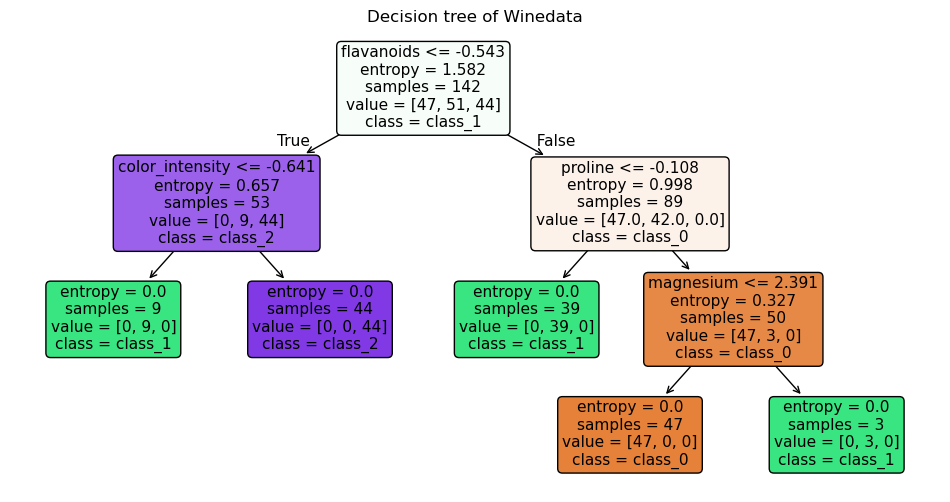

In [25]:
plt.figure(figsize=(12,6))
plot_tree(classifier,feature_names=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],class_names=['class_0', 'class_1', 'class_2'],filled=True,rounded=True)
plt.title("Decision tree of Winedata")
plt.show()

**2)RANDOMFOREST CLASSIFIER**

**Training**

In [28]:
classifier2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
classifier2.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

**Prediction**

In [30]:
y_pred_rfc=classifier2.predict(x_test)
y_pred_rfc

array([1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [31]:
classifier2.predict(scaler.transform([[14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0]]))

array([0])

**Evaluation**

In [33]:
cm2=confusion_matrix(y_test,y_pred_rfc)
print(cm2)
accuracy2=accuracy_score(y_test,y_pred_rfc)
print("Accuracy:",accuracy2)

[[12  0  0]
 [ 0 19  1]
 [ 0  0  4]]
Accuracy: 0.9722222222222222


**Plotting Decision tree from Random Forest**

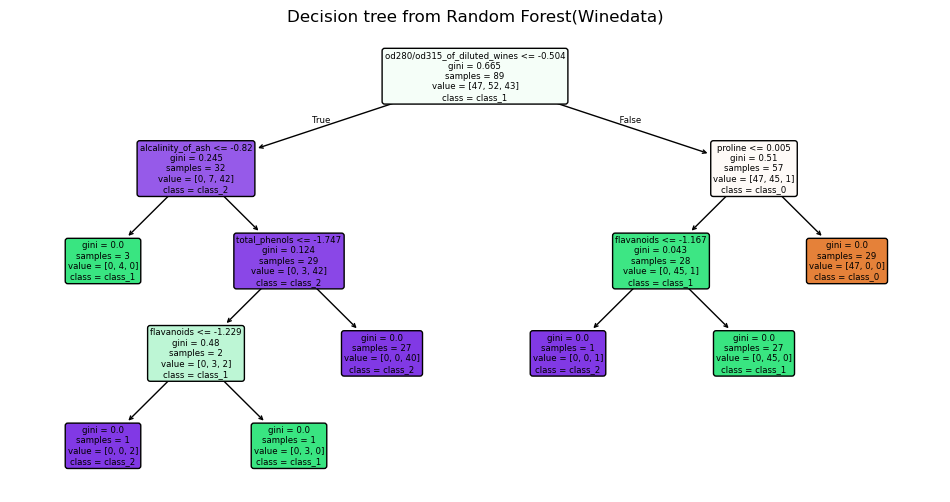

In [35]:
plt.figure(figsize=(12,6))
tree=classifier2.estimators_[0]
plot_tree(tree,feature_names=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],class_names=['class_0', 'class_1', 'class_2'],filled=True,rounded=True)
plt.title("Decision tree from Random Forest(Winedata)")
plt.show()

**3)SUPPORT VECTOR MACHINE CLASSIFIER**

**Training**

In [38]:
svm_model=SVC(kernel='rbf')
svm_model.fit(x_train,y_train)

SVC()

**Prediction**

In [40]:
y_pred_svc=svm_model.predict(x_test)
y_pred_svc

array([1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [41]:
svm_model.predict(scaler.transform([[14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0]]))

array([0])

**Evaluation**

In [43]:
cm3=confusion_matrix(y_test,y_pred_svc)
print(cm3)
accuracy3=accuracy_score(y_test,y_pred_svc)
print("Accuracy:",accuracy3)

[[11  1  0]
 [ 0 19  1]
 [ 0  0  4]]
Accuracy: 0.9444444444444444


## Observation

After evaluating the wine dataset using three different classification models,   
Decision Tree Classifier(DTC),Random Forest Classifier(RFC),and Support Vector Machine Classifier(SVM),the following   accuracy scores were observed:    

**-->Decision Tree Classifier (DTC): 0.92**    
**-->Random Forest Classifier (RFC): 0.97**    
**-->Support Vector Machine Classifier (SVM): 0.94**  

The RFC achieved the highest accuracy of 0.97. This suggests that the Random Forest model is the best-performing classifier for this dataset. The ensemble nature of Random Forest, which combines multiple decision trees, likely helps in reducing overfitting and improving generalization, making it more robust to noise and variability in the data.  
The SVC achieved an accuracy of 0.94, which is also quite strong. Support Vector Machines are known for their ability to perform well with high-dimensional spaces and complex, non-linear relationships.   
The DTC produced an accuracy of 0.92, which is the lowest of the three models.   

Conclusion:  
**The Random Forest Classifier (RFC) has the highest accuracy and is the most reliable model in this case**, followed by   Support Vector Classifier (SVC). The Decision Tree Classifier (DTC), although useful for interpretability, did not perform  as well in terms of accuracy. 